tarea clase 4

In [5]:
import pandas as pd

In [7]:
stroke_df = pd.read_csv('healthcare-dataset-stroke-data.csv') #derrame cerebral

In [ ]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
stroke_df.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

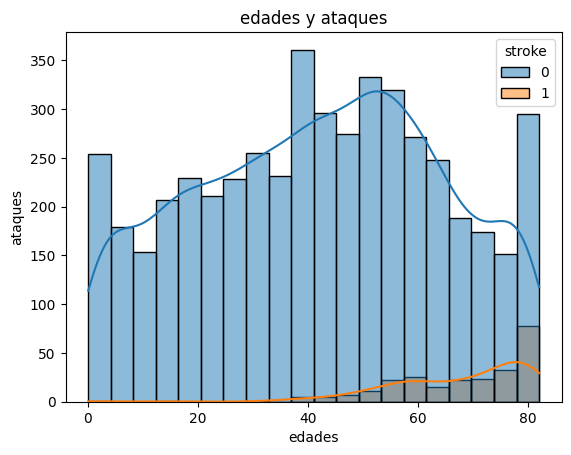

In [ ]:
sns.histplot( data=stroke_df,x='age', hue="stroke",kde=True) #+edad + tendencia a stroke
plt.title("edades y ataques")
plt.xlabel("edades")
plt.ylabel("ataques")
plt.show()

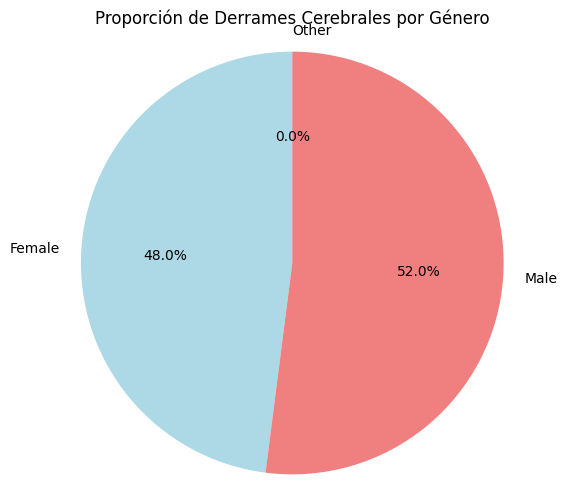

In [ ]:
# Calcular la proporción de pacientes que sufrieron un derrame por género (ayudado con chatgpt)
gender_stroke_counts = stroke_df.groupby('gender')['stroke'].value_counts(normalize=True).unstack().fillna(0) #groupby=agrupa dentro de gender. fillna(0)=rellena valores NaN con 0

# Crear el gráfico de tarta
plt.figure(figsize=(6, 6))
plt.pie(gender_stroke_counts[1], labels=gender_stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Proporción de Derrames Cerebrales por Género')
plt.axis('equal')  # Hace que el gráfico sea circular

# Mostrar el gráfico
plt.show()

<Figure size 800x600 with 0 Axes>

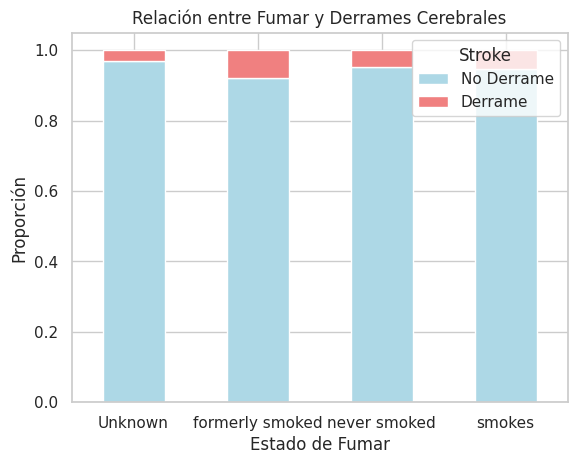

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Agrupa los datos por 'smoking_status' y 'stroke' y calcula la proporción de derrames en cada grupo
smoking_stroke_counts = stroke_df.groupby(['smoking_status', 'stroke'])['stroke'].count().unstack().fillna(0)
smoking_stroke_counts = smoking_stroke_counts.div(smoking_stroke_counts.sum(axis=1), axis=0)

# Crea el gráfico de barras apiladas
smoking_stroke_counts.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])
plt.title('Relación entre Fumar y Derrames Cerebrales')
plt.xlabel('Estado de Fumar')
plt.ylabel('Proporción')

# Personaliza las etiquetas del eje X
plt.xticks(rotation=0)

# Muestra el gráfico
plt.legend(title='Stroke', loc='upper right', labels=['No Derrame', 'Derrame'])
plt.show() #se ve que no parece haber una relacion entre las distintas clasificaciones de fumadores pero si se ve que entre menos fuma mejor

In [11]:
with_stroke = stroke_df[stroke_df['stroke'] == 1]
mediana = with_stroke['age'].median()
media = with_stroke['age'].mean()
moda = with_stroke ['age'].mode()
print(f"La mediana de la edad al tener un derrame es: {mediana} años")
print(f"La el promedio de la edad al tener un derrame es: {media} años")
print(f"La moda de la edad al tener un derrame es: {moda} años")

La mediana de la edad al tener un derrame es: 71.0 años
La el promedio de la edad al tener un derrame es: 67.72819277108434 años
La moda de la edad al tener un derrame es: 0    78.0
Name: age, dtype: float64 años


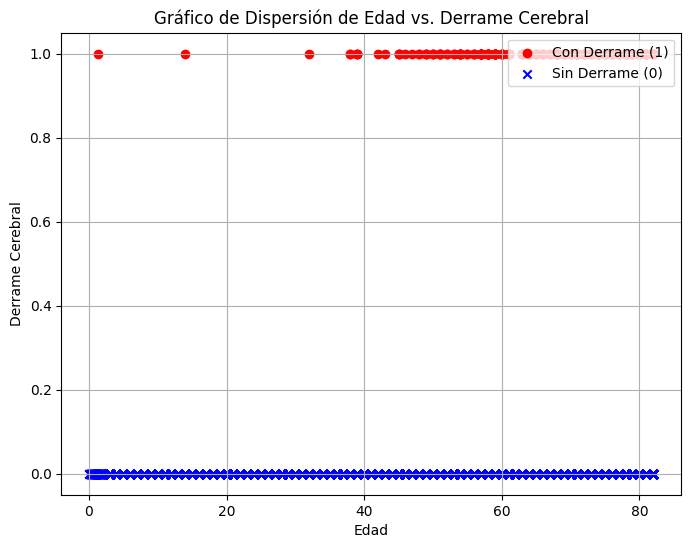

In [9]:
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico si es necesario

# Divide los datos en dos grupos: con derrame (stroke=1) y sin errame (stroke=0)
with_stroke = stroke_df[stroke_df['stroke'] == 1]
without_stroke = stroke_df[stroke_df['stroke'] == 0]

# Crea el gráfico de dispersión para ambas categorías
plt.scatter(with_stroke['age'], with_stroke['stroke'], c='red', marker='o', label='Con Derrame (1)')
plt.scatter(without_stroke['age'], without_stroke['stroke'], c='blue', marker='x', label='Sin Derrame (0)')

plt.xlabel('Edad')
plt.ylabel('Derrame Cerebral')
plt.title('Gráfico de Dispersión de Edad vs. Derrame Cerebral')
plt.legend(loc='upper right')

plt.grid(True)  # Agrega una cuadrícula si lo deseas

plt.show()

In [13]:
rango_edad = stroke_df['age'].max() - stroke_df['age'].min()
print(f"Rango de edad: {rango_edad}")
desviacion_estandar_edad = stroke_df['age'].std()
print(f"Desviación estándar de edad: {desviacion_estandar_edad}")
desviacion_media_edad = stroke_df['age'].mad()
print(f"Desviación media de edad: {desviacion_media_edad}")

Rango de edad: 81.92
Desviación estándar de edad: 22.61264672311349
Desviación media de edad: 19.116641250607955


<ipython-input-13-09f8742a45c7>:5: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desviacion_media_edad = stroke_df['age'].mad()


1) se puede identificar variables como genero,casado,enfermedad de corazon,si fuma, etc. Todas son de tipo object.
tambien se pueden ver variables como edad, nivel promedio de glucosa o indice de masa corporal con variable float.
Por ultimo identificamos variables como hipertension, enfermedad de corazon, derrame cerebral (al ser respuestas binarias. si/no) se indentifican con INT por ser valor entero

2) se puede llegar a la hipotesis de que. Segun este dataset las personas mas propensas a sufrir un derrame cerebral son los hombres (+40 años y mientras mas viejo mas posibilidades) a demas de que las posibilidades tambien aumentan si esa persona fuma o fumo alguna vez en su vida

3) use grafico de tipo barra porque podia comprar mas de una variable a la vez, use grafico de torta porque servia para la legibilidad ya que solo comparaba dos generos y el Si o No de un derrame. Y tambien use un histograma para comparar los casos de derrame en relacion a la edad de las personas

4) se puede analizar que el valor que representa la mediana de edad de derrames es 71 años, otra variable de tendencia central es el promedio (media), se ve que el promedio de edad al derrame es 68 años. Tambien esta la moda, que es 78 años.
En relacion a las medidas de dispersion, se puede ver que al haber un rango de 81 y desviacion de 20 se puede decir que los datos cuentan con una mayor heterogeneidad y tienen valores muy dispersos entre si y en relacion del uno con el otro

5) Gracias al grafico de dispersion se puede ver que: en los datos de personas que sufrieron un derrame, se encuentran outliers, se debe a que el valor de edad a la que sufrieron un derrame comparado con la media de los demas datos
